In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import onnxruntime as rt
import onnx
from skl2onnx.common.data_types import FloatTensorType
from skl2onnx import to_onnx
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from skl2onnx import convert_sklearn

import seaborn as sns

/var/folders/g5/pq1216cd2x310s210s2jx33w0000gn/T/ipykernel_60973/1985211704.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [15]:
# Let's load the dataset
data = pd.read_csv('data/synth_data_for_training.csv')

# Let's split the dataset into train and test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
train, test = train_test_split(data, test_size=0.25, random_state=42)
print(train.shape, test.shape)

# Save the data
train.to_csv('data/train.csv', index=False)
test.to_csv('data/test.csv', index=False)      # Use test data for black-box testing

(9483, 316) (3162, 316)


Below we will use the train set to create a biased one for training the bad model.

(886, 316)
(154, 316)
(886, 316)


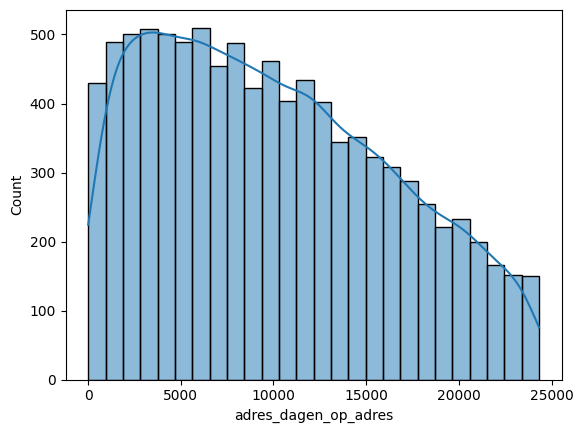

In [5]:
# Load the train set and split into X_train and Y_train
data = pd.read_csv('data/train.csv')
# y_train = data['checked']
# X_train = data.drop(['checked'], axis=1)
# X_train = X_train.astype(np.float32)
# print(X_train.shape, y_train.shape)

# Create plots to visualize the original distribution in data
print(data[(data['adres_dagen_op_adres'] < 1825)].shape)                           # 886 people have been living at the same address for less than 5 years
print(data[(data['adres_dagen_op_adres'] < 1825) & data['checked'] == 1].shape)    # 154 of these were marked as high-risk

# Create histogram of adres_dagen_op_adres
sns.histplot(data['adres_dagen_op_adres'], kde=True)   # kde = kernel density estimation

# TODO: Create stacked bar chart of adres_dagen_op_adres and proportion checked


In [8]:
# For all people who have been living at the same address for less than 2 years, we will mark them as high-risk
data['checked'] = np.where(data['adres_dagen_op_adres'] < 1825, 1, data['checked'])
print(data[(data['adres_dagen_op_adres'] < 1825) & data['checked'] == 1].shape)    # All 886 of these are now marked as high-risk
print(data.shape)

# Export biased train set for training bad model
data.to_csv('data/train_biased.csv', index=False)

(886, 316)
(9483, 316)


Igor: below you could create the augmented dataset for training the good model.